# Analysis
Now let's delve deeper into the analysis!

## Load DataFrames

In [1]:
# import things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in files
fb_congress_df = pd.read_pickle("pickle/fb_congress_df_part1.pkl")
fb_congress_df2 = pd.read_pickle("pickle/fb_congress_df_part2.pkl")

# merging them
fb_congress_df = fb_congress_df.append(fb_congress_df2)

In [3]:
# read in fb wiki
fb_wiki_df = pd.read_pickle("pickle/fb_wiki_df.pkl")

In [4]:
# read in fitocracy
fitocracy_df = pd.read_pickle("pickle/fitocracy_df.pkl")

In [5]:
# read in reddit
reddit_df = pd.read_pickle("pickle/reddit_df.pkl")

In [6]:
# read in ted
ted_responses_df = pd.read_pickle("pickle/ted_responses_df.pkl")

## Conduct basic analysis
Some of this information will be repetition from previous files, but I want to have it all in one place here.

### Analysis of Facebook Congress

In [7]:
fb_congress_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,video,57265377,Roger Williams,Congress_Republican,M,Jerry,"Yesterday, my colleagues and I voted to protec...",Protecting birth is not the same as protecting...
1,0,video,57265377,Roger Williams,Congress_Republican,M,Andrea,"Yesterday, my colleagues and I voted to protec...",You need to protect children and leave my body...
2,0,video,57265377,Roger Williams,Congress_Republican,M,Sherry,"Yesterday, my colleagues and I voted to protec...",Thank you
3,0,video,57265377,Roger Williams,Congress_Republican,M,Bob,"Yesterday, my colleagues and I voted to protec...",Thank you Roger
4,0,video,57265377,Roger Williams,Congress_Republican,M,Joy,"Yesterday, my colleagues and I voted to protec...",Unwanted pregnancy is a sad and unfortunate si...


In [8]:
unique_posts = fb_congress_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

link      210499
photo     199123
status     87921
video      46842
event       3417
music        278
note         261
Name: post_type, dtype: int64

In [9]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

Congress_Republican     239909
Congress_Democratic     158237
                        149304
Congress_Independent       891
Name: op_category, dtype: int64

Note: the ones with no category are the ones with no response corresponding to that post.

In [10]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

M    413011
W    135330
Name: op_gender, dtype: int64

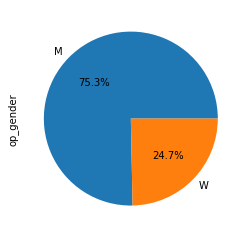

In [18]:
# plot gender
unique_posts.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fbcongress_op_gender.png')

# show plot
plt.show()

In [19]:
# average num responses for everyone
fb_congress_df.post_id.value_counts().mean()

25.560392164729613

In [20]:
# average number of responses per gender

print('average responses when poster is male:', fb_congress_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_congress_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 25.473808203655594
average responses when poster is female: 25.824636074780166


Basic analysis conclusion: There are a lot more male posters. Also, the average number of responses doesn't really vary per gender. The information about the post type and op_category is interesting, but doesn't really relate to my current study.

### Analysis of Facebook Wiki

In [21]:
fb_wiki_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Michelle,Tornado watch in effect tonight. Be safe. Plea...,Is this watch going to make it to LaPorte county?
1,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,Anything for Wilmington area
2,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Darlene,Tornado watch in effect tonight. Be safe. Plea...,"Thanks, please keep us posted."
3,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Tornado watch in effect tonight. Be safe. Plea...,Thanks Byron
4,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,[[STICKER]]


In [22]:
unique_posts = fb_wiki_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

photo     61411
link      37609
status    33495
video     16026
event       859
note         32
music        16
Name: post_type, dtype: int64

In [23]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

                                                                   31637
Wikipedia_American_television_actresses                            22822
Wikipedia_American_television_news_anchors                         17925
Wikipedia_American_television_talk_show_hosts                      16607
Wikipedia_American_female_tennis_players                           14855
Wikipedia_American_film_actresses                                  14579
Wikipedia_American_male_film_actors                                12304
Wikipedia_American_television_journalists                          10285
Wikipedia_American_male_television_actors                           3330
Wikipedia_Women_economists                                          2945
Wikipedia_American_male_tennis_players                               957
Wikipedia_21st-century_American_novelists                            792
Wikipedia_Political_analysts                                         338
Wikipedia_Olympic_track_and_field_athletes_of_the_U

In [24]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

W    99692
M    49756
Name: op_gender, dtype: int64

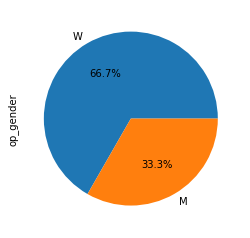

In [25]:
# plot gender
unique_posts.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fbwiki_op_gender.png')

# show plot
plt.show()

In [26]:
# average num responses for everyone
fb_wiki_df.post_id.value_counts().mean()

71.5910350088325

In [27]:
# average number of responses per gender

print('average responses when poster is male:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 71.25723530830453
average responses when poster is female: 71.75763351121454


Basic analysis conclusion: This file is set up the same as Facebook Congress, so for the same reasons, we only have a figure for op_gender. Again, the average number of responses doesn't really vary between male and female posters.

### Analysis of Fitocracy

In [28]:
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."


In [29]:
# make sure post id is unique again
print(fitocracy_df.post_id.nunique())
print(len(fitocracy_df.post_id))

318535
318535


In [30]:
# different op genders
fitocracy_df.op_gender.value_counts()

M    173738
W    144797
Name: op_gender, dtype: int64

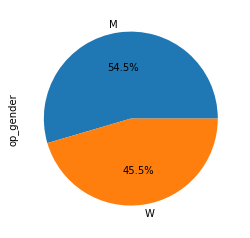

In [31]:
# plot gender
fitocracy_df.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fit_op_gender.png')

# show plot
plt.show()

In [32]:
# different responder genders
fitocracy_df.responder_gender.value_counts()

W    163315
M    155220
Name: responder_gender, dtype: int64

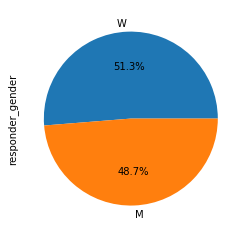

In [33]:
# plot gender
fitocracy_df.responder_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fit_responder_gender.png')

# show plot
plt.show()

In [34]:
# can't do average number responses per gender - there is only one response per post

# instead, look at how many males respond to males vs. females and how many females respond to males vs. females
fitocracy_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          W                   94375
           M                   79363
W          M                   75857
           W                   68940
Name: responder_gender, dtype: int64

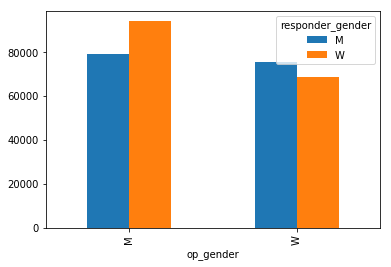

In [36]:
# plot this
fitocracy_df.groupby('op_gender').responder_gender.value_counts().unstack().plot(kind='bar')

# save figure
plt.savefig('images/fit_gender_groupby.png')

# show graph
plt.show()

Basic analysis conclusion: This time, male vs. female posters/responders is much more evenly distributed. Additionally, we can see that when op_gender is male, there are more female responders than male responders and when op_gender is female, there are more male responders than female responders. This is interesting!

### Analysis of Reddit

In [37]:
reddit_df.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
0,0,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,slayer task perhaps?,or low level. I mean hes wearing black armour ...
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
2,2,2007scape,DCBizzle,M,False,minixmatt,,unknown_gender,Whats a tonk? lol,"<link> TONK, TONK"
3,3,2007scape,ordona,M,False,Namiweso,,unknown_gender,Do the Stronghold of Security for a free 10k t...,Thanks I forgot about that place! :)
4,4,2007scape,SlayerMaster,M,False,Quantization,,unknown_gender,I cant tell if this guy just doesnt speak Engl...,Or hes just trolling.


In [38]:
# make sure post id is unique again
print(reddit_df.post_id.nunique())
print(len(reddit_df.post_id))

1453512
1453512


In [39]:
# different subreddits
reddit_df.subreddit.value_counts()

AskReddit               344400
AskMen                  133920
politics                 46727
funny                    44761
pics                     42920
relationships            34809
AdviceAnimals            33965
worldnews                33571
todayilearned            32652
nba                      32242
gaming                   27855
news                     27225
nfl                      27194
videos                   26940
WTF                      26682
soccer                   22315
leagueoflegends          22151
CasualConversation       21517
movies                   20567
OkCupid                  18239
CFB                      16025
anime                    15254
europe                   15233
hockey                   14949
Fitness                  14909
teenagers                12809
pcmasterrace             11841
explainlikeimfive        11270
SquaredCircle            11249
technology               11244
                         ...  
xboxone                   2932
heroesof

In [40]:
# different op genders
reddit_df.op_gender.value_counts()

M    1148591
W     304921
Name: op_gender, dtype: int64

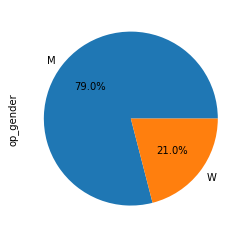

In [41]:
# plot gender
reddit_df.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/reddit_op_gender.png')

# show plot
plt.show()

In [42]:
# different responder genders
reddit_df.responder_gender.value_counts()
# blank is unknown

     1320290
M     102530
W      30692
Name: responder_gender, dtype: int64

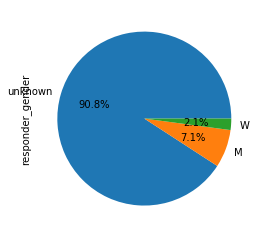

In [43]:
# plot gender
labels = ['unknown','M','W']
reddit_df.responder_gender.value_counts().plot(kind='pie', labels=labels, autopct='%1.1f%%')

# save figure
plt.savefig('images/reddit_responder_gender.png')

# show plot
plt.show()

In [45]:
# look at how many males respond to males vs. females and how many females respond to males vs. females
# eliminating when unknown
reddit_df[reddit_df.responder_gender != ''].groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          M                   80705
           W                   22883
W          M                   21825
           W                    7809
Name: responder_gender, dtype: int64

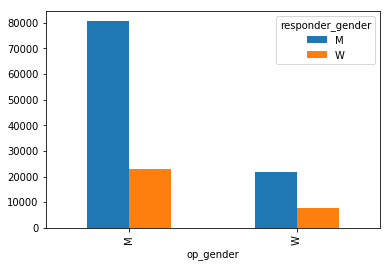

In [46]:
# plot this
reddit_df[reddit_df.responder_gender != ''].groupby('op_gender').responder_gender.value_counts().unstack().plot(kind='bar')

# save figure
plt.savefig('images/reddit_gender_groupby.png')

# show graph
plt.show()

Let's look at male vs. female posters by subreddit and see if we can find any patterns. It was my assumption that maybe there was so much more male posters and responders was because of the prominent AskMen subreddit.

In [47]:
# copying in from another file, but I thought it was important to look at again
subgroups = reddit_df.groupby('subreddit').op_gender.value_counts()
subgroups_df = subgroups.unstack()
subgroups_df.head()

op_gender,M,W
subreddit,,
2007scape,886.0,42.0
AdviceAnimals,25525.0,8440.0
Amd,860.0,19.0
AskMen,110542.0,23378.0
AskOuija,98.0,19.0


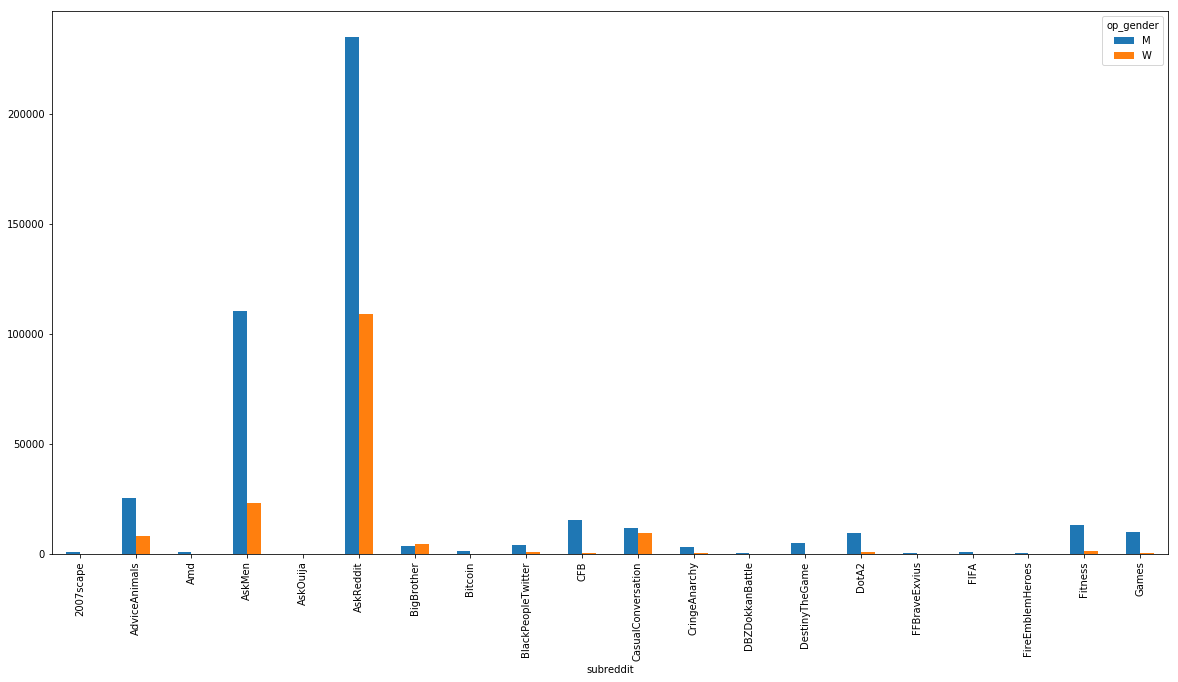

In [48]:
# graph the first 20 subreddits to get some idea
subgroups_df[:20].plot(kind='bar', figsize=(20,10))

# save figure
plt.savefig('images/subreddits.png')

# show graph
plt.show()

So just looking at a flash of the data, 'AskMen' doesn't seem to stand out as a much higher male:female ratio. It seems like most have more male. Maybe Reddit is just a male-dominated site.

Are there any groups where there are more women? From the graph, it looks like the subreddit "BigBrother" has more female posters. Let's see what else...

In [49]:
subgroups_df[subgroups_df.W > subgroups_df.M]

op_gender,M,W
subreddit,,
BigBrother,3564.0,4647.0
aww,4400.0,4597.0
counting,267.0,531.0
relationships,10951.0,23858.0
rupaulsdragrace,153.0,728.0


So with all these subreddits - there are only 5 that have more female than male posters!

Basic analysis conclusion: With this data set, the men seem to dominate the distribution in both posters and responders. Thus, it makes sense that there are more male responders for both male and female posters.

### Analysis of TED

In [50]:
ted_responses_df.head()

,post_id,op_id,op_gender,responder_id,response_text
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl..."
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat..."
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...


In [51]:
# different op genders
ted_responses_df.op_gender.value_counts()

M    144336
W     46011
Name: op_gender, dtype: int64

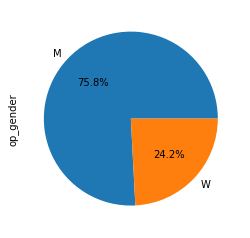

In [54]:
# plot gender
ted_responses_df.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/ted_op_gender.png')

# show plot
plt.show()

Basic analysis conclusion: There are a lot more male "posters" than female. Not much else to analyze here...

## Conduct linguistic analysis
Next, we'll look at the actual text. Let's start by conducting some simple linguistic analysis, like token count, sentence length, and TTR.

### Facebook Congress linguistic analysis

In [55]:
# making a smaller sample to do analysis on since it's way too big
# how big again?
fb_congress_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015811 entries, 0 to 14015810
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 1.0+ GB


In [56]:
fb_congress_df.op_category.value_counts()

Congress_Republican     8886650
Congress_Democratic     4786769
Congress_Independent     193088
                         149304
Name: op_category, dtype: int64

In [57]:
# so there are 14M entries. That's a TON to tokenize. Let's take a sample of 50,000
# exclude when responses don't exist for a post
fb_congress_sample = fb_congress_df[fb_congress_df.response_text != ''].sample(50000)
fb_congress_sample.sort_index(inplace=True)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
14,1,video,57265377,Roger Williams,Congress_Republican,M,Staci,Roses are red...and so is Texas. Let's keep it...,Only because of gerrymandering.
149,3,video,57265377,Roger Williams,Congress_Republican,M,Vita,Since President Donald J. Trump was sworn in o...,Thank God for Trump and all who voted for him
965,26,video,57265377,Roger Williams,Congress_Republican,M,Char,In 15 days we will restore conservative values...,More than ready.
984,26,video,57265377,Roger Williams,Congress_Republican,M,Kathryn,In 15 days we will restore conservative values...,William Guess
1019,26,video,57265377,Roger Williams,Congress_Republican,M,Russ,In 15 days we will restore conservative values...,Get Obamacare changed! Killing families and s...


In [58]:
# make sure we still have all post types, op categories, and op genders
print(fb_congress_sample.post_type.value_counts())
print(fb_congress_sample.op_category.value_counts())
print(fb_congress_sample.op_gender.value_counts())

link      17071
photo     14574
status     9553
video      8722
event        65
note         11
music         4
Name: post_type, dtype: int64
Congress_Republican     32202
Congress_Democratic     17126
Congress_Independent      672
Name: op_category, dtype: int64
M    37670
W    12330
Name: op_gender, dtype: int64


In [59]:
# use nltk's tokenizer
import nltk

fb_congress_sample['post_tokens'] = fb_congress_sample.post_text.map(nltk.word_tokenize)
fb_congress_sample['response_tokens'] = fb_congress_sample.response_text.map(nltk.word_tokenize)

In [60]:
# find text length
fb_congress_sample['post_length'] = fb_congress_sample.post_tokens.map(len)
fb_congress_sample['response_length'] = fb_congress_sample.response_tokens.map(len)

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
14,1,video,57265377,Roger Williams,Congress_Republican,M,Staci,Roses are red...and so is Texas. Let's keep it...,Only because of gerrymandering.,"[Roses, are, red, ..., and, so, is, Texas, ., ...","[Only, because, of, gerrymandering, .]",23,5
149,3,video,57265377,Roger Williams,Congress_Republican,M,Vita,Since President Donald J. Trump was sworn in o...,Thank God for Trump and all who voted for him,"[Since, President, Donald, J., Trump, was, swo...","[Thank, God, for, Trump, and, all, who, voted,...",69,10
965,26,video,57265377,Roger Williams,Congress_Republican,M,Char,In 15 days we will restore conservative values...,More than ready.,"[In, 15, days, we, will, restore, conservative...","[More, than, ready, .]",17,4
984,26,video,57265377,Roger Williams,Congress_Republican,M,Kathryn,In 15 days we will restore conservative values...,William Guess,"[In, 15, days, we, will, restore, conservative...","[William, Guess]",17,2
1019,26,video,57265377,Roger Williams,Congress_Republican,M,Russ,In 15 days we will restore conservative values...,Get Obamacare changed! Killing families and s...,"[In, 15, days, we, will, restore, conservative...","[Get, Obamacare, changed, !, Killing, families...",17,16


Let's look at length in a boxplot grouping by gender!

average post length when poster is male: 58.9231218476241
average post length when poster is female: 78.85855636658556


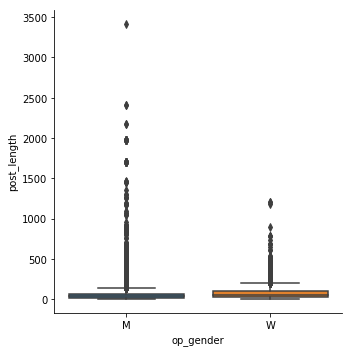

In [61]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_congress_sample)
print('average post length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length.mean())

So female posters seem to typically have longer posts than male posters! Is this significant?

In [62]:
from scipy import stats

stats.ttest_ind(fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length,
                fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length,
                equal_var=False)

Ttest_indResult(statistic=-22.621774312311068, pvalue=3.1522500824066486e-112)

Wow, very significant! We can safely conclude female posters have longer posts than male posters.

average response length when poster is male: 31.644385452614813
average response length when poster is female: 31.69213300892133


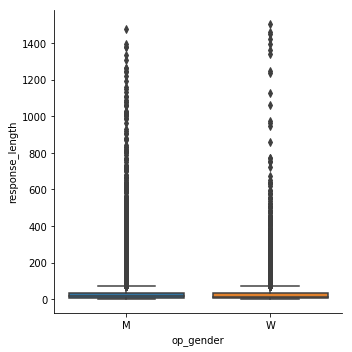

In [64]:
# plot the response length too
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].response_length.mean())

This time, op_gender doesn't make much of a difference in the length of the responses.

In [65]:
# getting sentence lengths
post_sent_count = fb_congress_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_congress_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [79]:
# find average sentence length
post_avg_sent_length = fb_congress_sample.post_length / post_sent_count
response_avg_sent_length = fb_congress_sample.response_length / response_sent_count

# if NaN, set to 0
post_avg_sent_length.fillna(0, inplace=True)
response_avg_sent_length.fillna(0, inplace=True)

In [80]:
# make new columns
fb_congress_sample['post_avg_slen'] = post_avg_sent_length
fb_congress_sample['response_avg_slen'] = response_avg_sent_length

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
14,1,video,57265377,Roger Williams,Congress_Republican,M,Staci,Roses are red...and so is Texas. Let's keep it...,Only because of gerrymandering.,"[Roses, are, red, ..., and, so, is, Texas, ., ...","[Only, because, of, gerrymandering, .]",23,5,7.666667,5.000000
149,3,video,57265377,Roger Williams,Congress_Republican,M,Vita,Since President Donald J. Trump was sworn in o...,Thank God for Trump and all who voted for him,"[Since, President, Donald, J., Trump, was, swo...","[Thank, God, for, Trump, and, all, who, voted,...",69,10,13.800000,10.000000
965,26,video,57265377,Roger Williams,Congress_Republican,M,Char,In 15 days we will restore conservative values...,More than ready.,"[In, 15, days, we, will, restore, conservative...","[More, than, ready, .]",17,4,8.500000,4.000000
984,26,video,57265377,Roger Williams,Congress_Republican,M,Kathryn,In 15 days we will restore conservative values...,William Guess,"[In, 15, days, we, will, restore, conservative...","[William, Guess]",17,2,8.500000,2.000000
1019,26,video,57265377,Roger Williams,Congress_Republican,M,Russ,In 15 days we will restore conservative values...,Get Obamacare changed! Killing families and s...,"[In, 15, days, we, will, restore, conservative...","[Get, Obamacare, changed, !, Killing, families...",17,16,8.500000,5.333333


In [81]:
# does gender of poster have an impact on sentence length?
fb_congress_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                   \
                  count       mean       std  min        25%   50%   75%   
op_gender                                                                  
M               37670.0  16.869514  9.540682  0.0  10.666667  16.0  22.4   
W               12330.0  19.079416  8.655696  0.0  13.350000  18.5  24.2   

                 response_avg_slen                                             \
             max             count       mean        std  min  25%  50%   75%   
op_gender                                                                       
M          266.0           37670.0  11.696946  11.346176  1.0  5.0  9.5  15.0   
W           98.0           12330.0  11.706135  11.228250  1.0  5.0  9.5  15.0   

                  
             max  
op_gender         
M          554.0  
W          529.5

In [95]:
# what is this really long sentence?
fb_congress_sample[fb_congress_sample.post_avg_slen == 266.0].post_text.iloc[0]

"I Am Thankful   I am thankful for the tears I shed when joyous and when sad  I am thankful for the laughter especially the times so rough it is all I had    I am thankful for the losses for showing me, even then, I am not defeated I am thankful for my detractors, who even when I win, make sure I don't get conceited     I am thankful for the wounds of past that showed me my capacity to heal I am thankful for frustrations, annoyances, and irritations along the way that showed me I can deal   I am thankful for the honest critics who help me to become wise I am thankful for the haters who challenges me to rise   I am thankful for the storms that have helped me master new skills I am thankful for the scorching fires that have seared away all, revealing invincible will   I am thankful for those who ask for help, for their courage it does teach I am thankful for those who don't wait to be asked to help, theirs is expansive love that fills the grievous breach   I am thankful for our rich dive

Ah... they just don't punctuate.

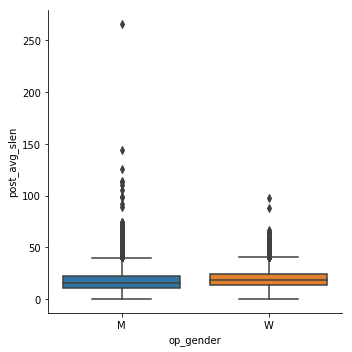

In [96]:
sns.catplot(x='op_gender', y='post_avg_slen', kind='box', data=fb_congress_sample)

Though it's hard to tell on the graph, it seems like female posters may use slightly longer sentences than male posters. Again, the length of the responses doesn't seem to change dependent on the gender of the poster.

Is the fact that female posters use longer sentences significant?

In [97]:
stats.ttest_ind(fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_avg_slen,
                fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_avg_slen,
                equal_var=False)

Ttest_indResult(statistic=-23.98006418470635, pvalue=1.5838106143632797e-125)

This seems strange/random to me, but it is significant that female posters use longer sentences than male posters.

Moving on - what about TTR?

In [98]:
# define TTR
def get_ttr(tokens):
    lower = [w.lower() for w in tokens]
    if len(lower) == 0:   # sometimes there was no text
        return None
    else:
        return len(set(lower))/len(lower)

In [99]:
# add to df
#fb_congress_sample['post_TTR'] = fb_congress_sample.post_tokens.map(get_ttr)
#fb_congress_sample['response_TTR'] = fb_congress_sample.response_tokens.map(get_ttr)
#fb_congress_sample.head()

Commented the above out because: is TTR even useful here? Sometimes the responses are so short that they have a TTR of 1. This doesn't help us.

It doesn't seem to make sense to calculate TTR at all since online posts are pretty short to begin with. TTR isn't very meaningful when there aren't very many words to even look at.

How about average google k-band?

In [100]:
# thanks Na-Rae for this code!

# reading file and setting up
# credit of the Google 1T English unigram frequency list goes to Peter Norbig's site: http://norvig.com/ngrams/
# these files can be used under the MIT license
google_1gram_lines = open('count_1w.txt').readlines()
google_1gram_tup = [tuple(line.split()) for line in google_1gram_lines]
google_1gram_rank = {word:index+1 for (index,(word, count)) in enumerate(google_1gram_tup)}

In [101]:
# thanks Na-Rae for this code!

import math

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 20000:  # limiting to 20k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [102]:
# applying to df
fb_congress_sample['post_avg_kband'] = fb_congress_sample.post_tokens.map(get_avg_google_kband)
fb_congress_sample['response_avg_kband'] = fb_congress_sample.response_tokens.map(get_avg_google_kband)

fb_congress_sample.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
14,1,video,57265377,Roger Williams,Congress_Republican,M,Staci,Roses are red...and so is Texas. Let's keep it...,Only because of gerrymandering.,"[Roses, are, red, ..., and, so, is, Texas, ., ...","[Only, because, of, gerrymandering, .]",23,5,7.666667,5.000000,1.562500,1.000000
149,3,video,57265377,Roger Williams,Congress_Republican,M,Vita,Since President Donald J. Trump was sworn in o...,Thank God for Trump and all who voted for him,"[Since, President, Donald, J., Trump, was, swo...","[Thank, God, for, Trump, and, all, who, voted,...",69,10,13.800000,10.000000,2.555556,3.000000
965,26,video,57265377,Roger Williams,Congress_Republican,M,Char,In 15 days we will restore conservative values...,More than ready.,"[In, 15, days, we, will, restore, conservative...","[More, than, ready, .]",17,4,8.500000,4.000000,1.785714,1.333333
984,26,video,57265377,Roger Williams,Congress_Republican,M,Kathryn,In 15 days we will restore conservative values...,William Guess,"[In, 15, days, we, will, restore, conservative...","[William, Guess]",17,2,8.500000,2.000000,1.785714,2.500000
1019,26,video,57265377,Roger Williams,Congress_Republican,M,Russ,In 15 days we will restore conservative values...,Get Obamacare changed! Killing families and s...,"[In, 15, days, we, will, restore, conservative...","[Get, Obamacare, changed, !, Killing, families...",17,16,8.500000,5.333333,1.785714,3.250000


In [103]:
fb_congress_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                35516.0  2.426729  0.819713  1.0  1.925000  2.320652   
W                11997.0  2.350607  0.689719  1.0  1.928571  2.267857   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.744186  20.0            36850.0  2.775925  2.237627  1.0   
W          2.684211  18.0            12079.0  2.744489  2.130702  1.0   

                                          
                25%       50%  75%   max  
op_gender                                 
M          1.650886  2.203637  3.0  20.0  
W          1.650000  2.195652  3.0  20.0

What does this tell us? Not much - the average k-band is about the same for male vs. female posters and in responses to male vs. female posters.

### Facebook Wiki linguistic analysis

In [104]:
# how big is this one again?
fb_wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699137 entries, 0 to 10699136
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 816.3+ MB


In [106]:
# still too large for my analysis, let's reduce to 50,000 again
# again ignoring when responses don't exist
fb_wiki_sample = fb_wiki_df[fb_wiki_df.response_text != ''].sample(50000)
fb_wiki_sample.sort_index(inplace=True)

In [107]:
# tokenize...
fb_wiki_sample['post_tokens'] = fb_wiki_sample.post_text.map(nltk.word_tokenize)
fb_wiki_sample['response_tokens'] = fb_wiki_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fb_wiki_sample['post_length'] = fb_wiki_sample.post_tokens.map(len)
fb_wiki_sample['response_length'] = fb_wiki_sample.response_tokens.map(len)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
150,12,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Maureen,FEEL FREE TO SHARE WITH YOUR FRIENDS: Vigorous...,Had to take the long way to San Diego today!,"[FEEL, FREE, TO, SHARE, WITH, YOUR, FRIENDS, :...","[Had, to, take, the, long, way, to, San, Diego...",52,11
162,13,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Marianne,Please share this ALERT WITH FRIENDS: THE NATI...,Stephanie Turner Millsaps....,"[Please, share, this, ALERT, WITH, FRIENDS, :,...","[Stephanie, Turner, Millsaps, ..., .]",60,5
341,39,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Kriti,Here it comes again !,When will the rain stop???I am dreaming of sun...,"[Here, it, comes, again, !]","[When, will, the, rain, stop, ?, ?, ?, I, am, ...",5,17
385,42,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Fran,"Here comes the rain. Temps in the 40s,with win...","Sums up our weather lately, a heater and a fan...","[Here, comes, the, rain, ., Temps, in, the, 40...","[Sums, up, our, weather, lately, ,, a, heater,...",77,24
393,43,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Weekend Storm Update: If the front moves north...,[[STICKER]],"[Weekend, Storm, Update, :, If, the, front, mo...","[[, [, STICKER, ], ]]",22,5


average post length when poster is male: 39.073814557535485
average post length when poster is female: 28.62119898340559


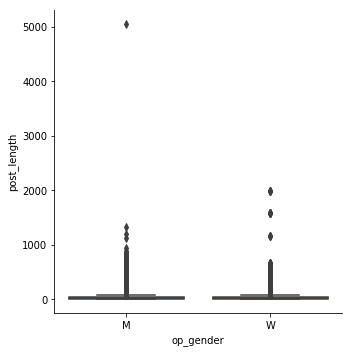

In [108]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_wiki_sample)

print('average post length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length.mean())

Interestingly, this is opposite from the Facebook Congress data. This time, the male posters have longer posts. It could also be specific to the sample - I'll have to make sure different samples are consistent to these results. Is this significant?

In [117]:
stats.ttest_ind(fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length,
                fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length,
                equal_var=False)

Ttest_indResult(statistic=14.6018587798289, pvalue=4.4581615455242374e-48)

Yes, still significant. I wonder what's going on here that it's the opposite from the Congress file. Maybe it just comes down to the fact that these are different types of people.

average response length when poster is male: 14.899124131682271
average response length when poster is female: 13.584392285842428


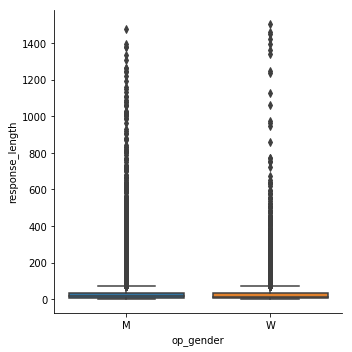

In [118]:
# look at response length again
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].response_length.mean())

Again, not a large difference in response length when responding to male vs. female posters.

In [119]:
# getting sentence lengths
post_sent_count = fb_wiki_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_wiki_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [120]:
# find average sentence length
post_avg_sent_length = fb_wiki_sample.post_length / post_sent_count
response_avg_sent_length = fb_wiki_sample.response_length / response_sent_count

# if NaN, set to 0
post_avg_sent_length.fillna(0, inplace=True)
response_avg_sent_length.fillna(0, inplace=True)

In [121]:
# make new columns
fb_wiki_sample['post_avg_slen'] = post_avg_sent_length
fb_wiki_sample['response_avg_slen'] = response_avg_sent_length

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
150,12,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Maureen,FEEL FREE TO SHARE WITH YOUR FRIENDS: Vigorous...,Had to take the long way to San Diego today!,"[FEEL, FREE, TO, SHARE, WITH, YOUR, FRIENDS, :...","[Had, to, take, the, long, way, to, San, Diego...",52,11,13.0,11.0
162,13,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Marianne,Please share this ALERT WITH FRIENDS: THE NATI...,Stephanie Turner Millsaps....,"[Please, share, this, ALERT, WITH, FRIENDS, :,...","[Stephanie, Turner, Millsaps, ..., .]",60,5,60.0,5.0
341,39,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Kriti,Here it comes again !,When will the rain stop???I am dreaming of sun...,"[Here, it, comes, again, !]","[When, will, the, rain, stop, ?, ?, ?, I, am, ...",5,17,5.0,8.5
385,42,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Fran,"Here comes the rain. Temps in the 40s,with win...","Sums up our weather lately, a heater and a fan...","[Here, comes, the, rain, ., Temps, in, the, 40...","[Sums, up, our, weather, lately, ,, a, heater,...",77,24,11.0,8.0
393,43,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Weekend Storm Update: If the front moves north...,[[STICKER]],"[Weekend, Storm, Update, :, If, the, front, mo...","[[, [, STICKER, ], ]]",22,5,11.0,5.0


In [122]:
# does gender of poster have an impact on sentence length?
fb_wiki_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                      \
                  count       mean       std  min       25%       50%   75%   
op_gender                                                                     
M               16555.0  10.526236  9.159646  0.0  5.000000  8.666667  14.4   
W               33445.0   9.665798  7.859855  0.0  5.333333  9.000000  13.0   

                 response_avg_slen                                      \
             max             count      mean        std  min  25%  50%   
op_gender                                                                
M          344.0           16555.0  7.539874   9.151907  1.0  3.0  5.0   
W          514.0           33445.0  7.343866  12.915786  1.0  2.5  5.0   

                                 
                75%         max  
op_gender                        
M          9.333333  526.000000  
W          9.000000  675.666667

This time, sentence length looks about equal in male vs. female posts, and well as in responses to male vs. female posters. Let's check the significance of average sentence length though, since there is a little difference.

In [123]:
stats.ttest_ind(fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_avg_slen,
                fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_avg_slen,
                equal_var=False)

Ttest_indResult(statistic=10.347186829596797, pvalue=4.766168581095463e-25)

Wow - it's still significant! However, this time, male posters have longer sentences than female posters. It seems that this goes along with the post length. By this, I mean that in the Congress file, female posters had longer posts and longer sentences, and in the Wiki file, male posters had longer posts and longer sentences.

In [125]:
# average google k-band
# applying to df
fb_wiki_sample['post_avg_kband'] = fb_wiki_sample.post_tokens.map(get_avg_google_kband)
fb_wiki_sample['response_avg_kband'] = fb_wiki_sample.response_tokens.map(get_avg_google_kband)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
150,12,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Maureen,FEEL FREE TO SHARE WITH YOUR FRIENDS: Vigorous...,Had to take the long way to San Diego today!,"[FEEL, FREE, TO, SHARE, WITH, YOUR, FRIENDS, :...","[Had, to, take, the, long, way, to, San, Diego...",52,11,13.0,11.0,3.279070,1.200000
162,13,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Marianne,Please share this ALERT WITH FRIENDS: THE NATI...,Stephanie Turner Millsaps....,"[Please, share, this, ALERT, WITH, FRIENDS, :,...","[Stephanie, Turner, Millsaps, ..., .]",60,5,60.0,5.0,2.416667,8.000000
341,39,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Kriti,Here it comes again !,When will the rain stop???I am dreaming of sun...,"[Here, it, comes, again, !]","[When, will, the, rain, stop, ?, ?, ?, I, am, ...",5,17,5.0,8.5,1.250000,2.923077
385,42,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Fran,"Here comes the rain. Temps in the 40s,with win...","Sums up our weather lately, a heater and a fan...","[Here, comes, the, rain, ., Temps, in, the, 40...","[Sums, up, our, weather, lately, ,, a, heater,...",77,24,11.0,8.0,2.362069,3.125000
393,43,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Weekend Storm Update: If the front moves north...,[[STICKER]],"[Weekend, Storm, Update, :, If, the, front, mo...","[[, [, STICKER, ], ]]",22,5,11.0,5.0,2.222222,9.000000


In [126]:
fb_wiki_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                14597.0  2.785865  1.767808  1.0  1.823529  2.413793   
W                29011.0  2.637749  1.470801  1.0  1.750000  2.324324   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          3.157025  19.5            15067.0  3.531153  3.347673  1.0   
W          3.090909  20.0            30472.0  3.880480  3.850480  1.0   

                                               
                25%       50%       75%   max  
op_gender                                      
M          1.533333  2.333333  4.000000  20.0  
W          1.553052  2.391768  4.333333  20.0

What does this tell us? Again - not much. The average k-band is about the same for all.

### Fitocracy linguistic analysis

In [127]:
# how big is this?
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [128]:
# again reduce to 50,000
fitocracy_sample = fitocracy_df.sample(50000)
fitocracy_sample.sort_index(inplace=True)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH
32,32,117,M,137055,M,With a cat on your face (and some vertical com...,"I am going to respond the Donny Shankle way, b..."
33,33,117,M,130842,W,DLs from today. From my working weight on up I...,315 was very nice! On the 250 I think you look...
37,37,117,M,502,M,ohmyholyyouravatarpic.jpg,Self portrait.


So now we have both op gender and responder gender! Let's conduct some linguistic analysis.

In [129]:
# tokenize...
fitocracy_sample['post_tokens'] = fitocracy_sample.post_text.map(nltk.word_tokenize)
fitocracy_sample['response_tokens'] = fitocracy_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fitocracy_sample['post_length'] = fitocracy_sample.post_tokens.map(len)
fitocracy_sample['response_length'] = fitocracy_sample.response_tokens.map(len)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],"[Thanks, for, the, follow, !, I, followed, bac...","[One, day, at, a, time, !, =, ]]",25,8
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1
32,32,117,M,137055,M,With a cat on your face (and some vertical com...,"I am going to respond the Donny Shankle way, b...","[With, a, cat, on, your, face, (, and, some, v...","[I, am, going, to, respond, the, Donny, Shankl...",29,17
33,33,117,M,130842,W,DLs from today. From my working weight on up I...,315 was very nice! On the 250 I think you look...,"[DLs, from, today, ., From, my, working, weigh...","[315, was, very, nice, !, On, the, 250, I, thi...",49,31
37,37,117,M,502,M,ohmyholyyouravatarpic.jpg,Self portrait.,[ohmyholyyouravatarpic.jpg],"[Self, portrait, .]",1,3


In [130]:
fitocracy_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             27266.0  17.282806  19.664518  1.0  7.0  11.0  20.0   880.0   
W             22734.0  18.635612  22.465101  1.0  8.0  11.0  22.0  1840.0   

          response_length                                                     
                    count       mean        std  min  25%   50%   75%    max  
op_gender                                                                     
M                 27266.0  24.603902  28.865557  1.0  6.0  12.0  29.0  495.0  
W                 22734.0  27.380663  30.989125  1.0  6.0  13.0  34.0  289.0

In [131]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min  25%   50%  \
op_gender responder_gender                                                  
M         M                 12486.0  16.828608  19.383409  1.0  5.0  10.0   
          W                 14780.0  31.172395  33.549118  1.0  6.0  14.0   
W         M                 11888.0  15.491841  17.422175  1.0  5.0  10.0   
          W                 10846.0  40.411673  36.817836  1.0  8.0  22.0   

                             75%    max  
op_gender responder_gender               
M         M                 21.0  495.0  
          W                 54.0  202.0  
W         M                 19.0  225.0  
          W                 86.0  289.0

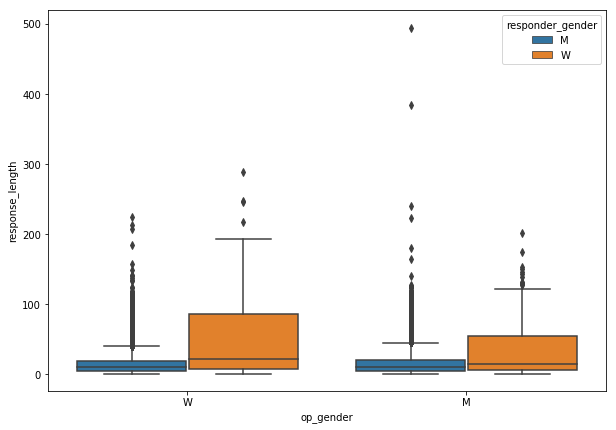

In [146]:
# plot
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_length', hue='responder_gender', data=fitocracy_sample)

# save figure
plt.savefig('images/fit_response_length_bygender.png')

# show
plt.show()

A lot to analyze here. Let's break this up a little:

#### Post length

Posts by females seem to be a little longer than posts by males.

#### Response length

Overall, responses to female posters seem to be a little longer than responses to male posters. Let's break it down even further:
- Male poster/male responder has shorter responses than male poster/female responder.
- Female poster/male responder has shorter responses than female poster/female responder.

So do female responders always have longer responses than male responders, regardless of the original poster's gender? It seems like it from this quick analysis.

Given this information about post and response length by gender, it seems like (for Fitocracy, at least) female posters and responders generally have longer posts/responses than their male counterparts.

#### Gender x Gender
Male responders have about the same length response when responding to male vs. female posters (responding to male is a little longer), but female responders have longer responses when responding to female than when responding to male.

Is any of this significant?

In [167]:
# t tests

# post length
print('ttest for post length:', stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].post_length,
                                                fitocracy_sample[fitocracy_sample.op_gender == 'W'].post_length,
                                                equal_var=False))
print('-----------')

# response length
print('ttest for response length by gender of poster:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].response_length,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

print('ttest for response length by gender of responder:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.responder_gender == 'M'].response_length,
                      fitocracy_sample[fitocracy_sample.responder_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'M')].response_length,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'W')].response_length,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'M')].response_length,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'W')].response_length,
                      equal_var=False))
print('-----------')

ttest for post length: Ttest_indResult(statistic=-7.092416643762396, pvalue=1.3370459410681049e-12)
-----------
ttest for response length by gender of poster: Ttest_indResult(statistic=-10.291305470103184, pvalue=8.194873036870981e-25)
-----------
ttest for response length by gender of responder: Ttest_indResult(statistic=-75.61277580173841, pvalue=0.0)
-----------
ttest for male responder: Ttest_indResult(statistic=5.667950192338964, pvalue=1.4615308535460228e-08)
-----------
ttest for female responder: Ttest_indResult(statistic=-20.60128009406426, pvalue=2.0225226085729757e-93)
-----------


Yay, these are all significant! In summary:
- Female posters have longer posts than male posters
- Reponses to female posters are longer than responses to male posters
- Female responders have longer responses than male responders
- Male responders have longer posts when responding to males than when responding to females
- Female responders have longer responses when responding to females than when responding to males

Let's move on to sentence length:

In [168]:
# getting sentence lengths
post_sent_count = fitocracy_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fitocracy_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [169]:
# find average sentence length
post_avg_sent_length = fitocracy_sample.post_length / post_sent_count
response_avg_sent_length = fitocracy_sample.response_length / response_sent_count

In [170]:
# make new columns
fitocracy_sample['post_avg_slen'] = post_avg_sent_length
fitocracy_sample['response_avg_slen'] = response_avg_sent_length

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],"[Thanks, for, the, follow, !, I, followed, bac...","[One, day, at, a, time, !, =, ]]",25,8,12.500000,4.00
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1,6.000000,1.00
32,32,117,M,137055,M,With a cat on your face (and some vertical com...,"I am going to respond the Donny Shankle way, b...","[With, a, cat, on, your, face, (, and, some, v...","[I, am, going, to, respond, the, Donny, Shankl...",29,17,14.500000,8.50
33,33,117,M,130842,W,DLs from today. From my working weight on up I...,315 was very nice! On the 250 I think you look...,"[DLs, from, today, ., From, my, working, weigh...","[315, was, very, nice, !, On, the, 250, I, thi...",49,31,16.333333,7.75
37,37,117,M,502,M,ohmyholyyouravatarpic.jpg,Self portrait.,[ohmyholyyouravatarpic.jpg],"[Self, portrait, .]",1,3,1.000000,3.00


In [171]:
# summarize again
fitocracy_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                       \
                  count      mean       std  min       25%  50%   75%    max   
op_gender                                                                      
M               27266.0  9.277067  6.507074  1.0  5.333333  8.0  11.0  167.0   
W               22734.0  9.266475  6.791521  1.0  5.500000  8.0  10.5  460.0   

          response_avg_slen                                                   
                      count       mean       std  min  25%  50%   75%    max  
op_gender                                                                     
M                   27266.0  10.043084  8.664341  1.0  4.0  7.0  12.0  124.0  
W                   22734.0  10.511973  9.308146  1.0  4.0  7.0  12.5   87.0

In [172]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min  25%  \
op_gender responder_gender                                            
M         M                 12486.0   8.456594   6.882566  1.0  4.0   
          W                 14780.0  11.383335   9.723906  1.0  4.0   
W         M                 11888.0   7.853163   6.215936  1.0  4.0   
          W                 10846.0  13.426220  11.091564  1.0  5.0   

                                  50%   75%    max  
op_gender responder_gender                          
M         M                  6.666667  11.0  124.0  
          W                  7.500000  14.5   63.0  
W         M                  6.000000  10.0   77.0  
          W                 10.000000  21.5   87.0

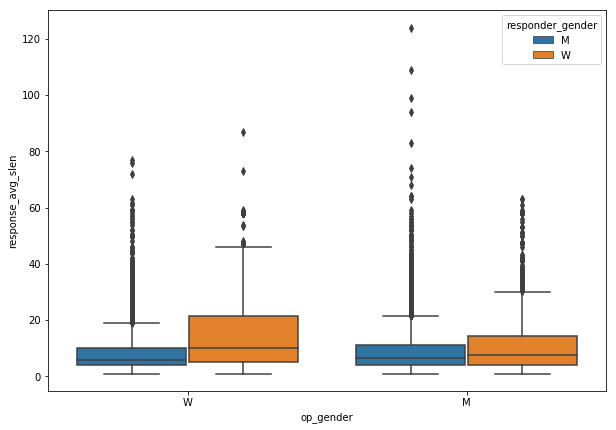

In [173]:
# plot
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_avg_slen', hue='responder_gender', data=fitocracy_sample)

# save figure
plt.savefig('images/fit_response_slen_bygender.png')

# show
plt.show()

Analyzing sentence length by gender:

#### Post sentence length

Posts by females and males seem to have about the same average sentence length.

#### Response sentence length

Responses to females vs. males seem to have about the same average sentence length, but let's again break it down further:
- Male poster/male responder has shorter sentences in the response than male poster/female responder.
- Female poster/male responder has shorter sentences in the response than female poster/female responder.

Summing that up, it seems like female responders use longer sentences regardless of the original poster's gender.

#### Gender x Gender
Male responders have a little bit longer sentences when responding to a male than when responding to a female, and female responders have a little bit longer sentences when responding to a female than when responding to a male.

Is any of this significant?

In [174]:
# t tests

# post slen
print('ttest for post sentence length:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].post_avg_slen,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].post_avg_slen,
                      equal_var=False))
print('-----------')

# response slen
print('ttest for response sentence length by gender of poster:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].response_avg_slen,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for response sentence length by gender of responder:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.responder_gender == 'M'].response_avg_slen,
                      fitocracy_sample[fitocracy_sample.responder_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'M')].response_avg_slen,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'M')].response_avg_slen,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))

ttest for post sentence length: Ttest_indResult(statistic=0.17697686139531343, pvalue=0.8595273175831629)
-----------
ttest for response sentence length by gender of poster: Ttest_indResult(statistic=-5.787258135270963, pvalue=7.19979380799323e-09)
-----------
ttest for response sentence length by gender of responder: Ttest_indResult(statistic=-52.86977177823007, pvalue=0.0)
-----------
ttest for male responder: Ttest_indResult(statistic=7.1898275561797815, pvalue=6.674878273795777e-13)
-----------
ttest for female responder: Ttest_indResult(statistic=-15.337878760410275, pvalue=8.129408119231024e-53)


Most of these are significant! In summary:
- There isn't a significant difference in sentence length for male vs. female posters
- Responses to female posters have longer sentences than responses to male posters (but probably by a very small amount! The mean sentence lengths were only different by 0.5...)
- Female responders have longer sentences than male responders
- Male responders have longer sentences when responding to males than when responding to females
- Female responders have longer sentences when responding to females than when responding to males

Onto k-band:

In [175]:
# computing average k-band
fitocracy_sample['post_avg_kband'] = fitocracy_sample.post_tokens.map(get_avg_google_kband)
fitocracy_sample['response_avg_kband'] = fitocracy_sample.response_tokens.map(get_avg_google_kband)

fitocracy_sample.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],"[Thanks, for, the, follow, !, I, followed, bac...","[One, day, at, a, time, !, =, ]]",25,8,12.500000,4.00,2.294118,1.000000
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1,6.000000,1.00,2.000000,NaN
32,32,117,M,137055,M,With a cat on your face (and some vertical com...,"I am going to respond the Donny Shankle way, b...","[With, a, cat, on, your, face, (, and, some, v...","[I, am, going, to, respond, the, Donny, Shankl...",29,17,14.500000,8.50,2.590909,2.250000
33,33,117,M,130842,W,DLs from today. From my working weight on up I...,315 was very nice! On the 250 I think you look...,"[DLs, from, today, ., From, my, working, weigh...","[315, was, very, nice, !, On, the, 250, I, thi...",49,31,16.333333,7.75,3.190476,1.416667
37,37,117,M,502,M,ohmyholyyouravatarpic.jpg,Self portrait.,[ohmyholyyouravatarpic.jpg],"[Self, portrait, .]",1,3,1.000000,3.00,NaN,3.500000


In [176]:
fitocracy_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                    \
                   count     mean       std  min  25%       50%  75%   max   
op_gender                                                                    
M                27052.0  2.39199  1.419001  1.0  1.4  2.058824  3.0  20.0   
W                22616.0  2.28772  1.280002  1.0  1.4  2.000000  3.0  20.0   

          response_avg_kband                                               \
                       count      mean       std  min       25%       50%   
op_gender                                                                   
M                    26396.0  2.351687  1.955239  1.0  1.343750  1.750000   
W                    22038.0  2.265032  1.917237  1.0  1.333333  1.714286   

                           
                75%   max  
op_gender                  
M          2.571429  20.0  
W          2.407407  20.0

In [177]:
fitocracy_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M         M                 12107.0  2.496296  2.076410  1.0  1.333333   
          W                 14289.0  2.229159  1.837547  1.0  1.400000   
W         M                 11470.0  2.357258  2.103953  1.0  1.200000   
          W                 10568.0  2.164936  1.685818  1.0  1.500000   

                                 50%       75%   max  
op_gender responder_gender                            
M         M                 1.921053  2.846154  20.0  
          W                 1.650794  2.333333  20.0  
W         M                 1.750000  2.636364  20.0  
          W                 1.650794  2.176471  20.0

Again, average k-band is about the same for everything.

### Reddit linguistic analysis

In [178]:
# how big is this?
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453512 entries, 0 to 1453511
Data columns (total 10 columns):
post_id                     1453512 non-null int64
subreddit                   1453512 non-null object
op_id                       1453512 non-null object
op_gender                   1453512 non-null object
op_gender_visible           1453512 non-null bool
responder_id                1453512 non-null object
responder_gender            1453512 non-null object
responder_gender_visible    1453512 non-null object
post_text                   1453512 non-null object
response_text               1453512 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 112.3+ MB


In [179]:
# reduce to 50,000 again
reddit_sample = reddit_df.sample(50000)
reddit_sample.sort_index(inplace=True)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo
43,43,2007scape,SeaNilly,M,False,JellyTotMonster,,unknown_gender,When you run out of food but still have restor...,"True, but if youre not good with the timing it..."
93,93,2007scape,SlayerMaster,M,False,Marasaur,,unknown_gender,Yeah and you want GE and spirit shields just t...,"i maxed the hard way, game is already easy. sp..."
94,94,2007scape,SlayerMaster,M,False,Hi_Noodle,,unknown_gender,Im looking at all the cml records and you guys...,"We dont claim to be an efficiency clan, we are..."
100,100,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,"None of those players have botted, but Rens go...",Thats why all of them are perm banned or have ...


In [180]:
# tokenize...
reddit_sample['post_tokens'] = reddit_sample.post_text.map(nltk.word_tokenize)
reddit_sample['response_tokens'] = reddit_sample.response_text.map(nltk.word_tokenize)

# ... and find length
reddit_sample['post_length'] = reddit_sample.post_tokens.map(len)
reddit_sample['response_length'] = reddit_sample.response_tokens.map(len)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo,"[How, do, you, afford, so, many, prayer, potio...","[hes, got, 85, rc, aka, mad, bank, yo]",38,8
43,43,2007scape,SeaNilly,M,False,JellyTotMonster,,unknown_gender,When you run out of food but still have restor...,"True, but if youre not good with the timing it...","[When, you, run, out, of, food, but, still, ha...","[True, ,, but, if, youre, not, good, with, the...",28,22
93,93,2007scape,SlayerMaster,M,False,Marasaur,,unknown_gender,Yeah and you want GE and spirit shields just t...,"i maxed the hard way, game is already easy. sp...","[Yeah, and, you, want, GE, and, spirit, shield...","[i, maxed, the, hard, way, ,, game, is, alread...",19,25
94,94,2007scape,SlayerMaster,M,False,Hi_Noodle,,unknown_gender,Im looking at all the cml records and you guys...,"We dont claim to be an efficiency clan, we are...","[Im, looking, at, all, the, cml, records, and,...","[We, dont, claim, to, be, an, efficiency, clan...",24,60
100,100,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,"None of those players have botted, but Rens go...",Thats why all of them are perm banned or have ...,"[None, of, those, players, have, botted, ,, bu...","[Thats, why, all, of, them, are, perm, banned,...",19,16


In [181]:
# summarize
reddit_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             39362.0  39.641736  60.796681  1.0  11.0  22.0  45.0  1894.0   
W             10638.0  46.442376  67.604099  1.0  13.0  26.0  54.0  1662.0   

          response_length                                                       
                    count       mean        std  min   25%   50%   75%     max  
op_gender                                                                       
M                 39362.0  34.443270  55.875244  1.0   9.0  19.0  39.0  2595.0  
W                 10638.0  36.900827  52.954558  1.0  10.0  20.0  43.0   983.0

In [193]:
reddit_sample[reddit_sample.responder_gender != ''].groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean         std  min   25%   50%  \
op_gender responder_gender                                                   
M         M                 2793.0  35.438955   52.863287  1.0  10.0  20.0   
          W                  774.0  48.175711  101.656781  1.0  12.0  25.0   
W         M                  749.0  41.327103   62.189882  1.0  11.0  22.0   
          W                  270.0  40.274074   48.951373  2.0  12.0  26.0   

                              75%     max  
op_gender responder_gender                 
M         M                 41.00  1165.0  
          W                 52.75  1992.0  
W         M                 46.00   983.0  
          W                 50.75   503.0

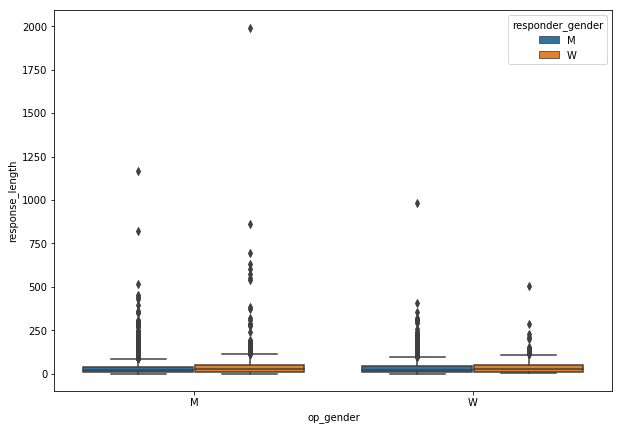

In [183]:
# plot (ignoring when responder gender is unknown)
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_length', hue='responder_gender', data=reddit_sample[reddit_sample.responder_gender != ''])

# save figure
plt.savefig('images/reddit_response_length_bygender.png')

# show
plt.show()

It's hard to tell from the boxplot, but from looking at the actual data, we can summarize some information:

#### Post length

Female posters seem to typically have longer posts than male posters.

#### Response length

Responses to female posters seem to be a little longer than responses to male posters. Let's dive a little deeper:

- Male poster/male responder has shorter response length than male poster/male responder.
- female poster/male responder has shorter response length than female poster/female responder.

Again, it seems that female responders typically have longer responses than male responders, regardless of the original poster's gender.

#### Gender x Gender

Interestingly (and opposite of our fitocracy data), male responders have longer responses when responding to females than when responding to males. Female responders have longer responses when responding to females than when responding to males.

Is any of this significant?

In [184]:
# t tests

# post length
print('ttest for post length:', stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].post_length,
                                                reddit_sample[reddit_sample.op_gender == 'W'].post_length,
                                                equal_var=False))
print('-----------')

# response length
print('ttest for response length by gender of poster:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].response_length,
                      reddit_sample[reddit_sample.op_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

print('ttest for response length by gender of responder:',
      stats.ttest_ind(reddit_sample[reddit_sample.responder_gender == 'M'].response_length,
                      reddit_sample[reddit_sample.responder_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'M')].response_length,
                      reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'W')].response_length,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'M')].response_length,
                      reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'W')].response_length,
                      equal_var=False))

ttest for post length: Ttest_indResult(statistic=-9.398986334716374, pvalue=6.2580025292539e-21)
-----------
ttest for response length by gender of poster: Ttest_indResult(statistic=-4.196711633911714, pvalue=2.7214911104973673e-05)
-----------
ttest for response length by gender of responder: Ttest_indResult(statistic=-3.186050838719572, pvalue=0.0014772562869899857)
-----------
ttest for male responder: Ttest_indResult(statistic=-2.371592876586285, pvalue=0.01789027111339634)
-----------
ttest for female responder: Ttest_indResult(statistic=1.6760288025988237, pvalue=0.09406374028861035)


Again, most of these are significant. In summary:
- Female posters have longer posts than male posters
- Responses to female posters are longer than responses to male posters
- Female responders have longer responses than male responders
- Male responders have longer responses when responding to females than when responding to males
- There isn't a significant difference in female response length when responding to males vs. females

Onto sentence length:

In [185]:
# getting sentence lengths
post_sent_count = reddit_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = reddit_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [186]:
# find average sentence length
post_avg_sent_length = reddit_sample.post_length / post_sent_count
response_avg_sent_length = reddit_sample.response_length / response_sent_count

In [187]:
# make new columns
reddit_sample['post_avg_slen'] = post_avg_sent_length
reddit_sample['response_avg_slen'] = response_avg_sent_length

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo,"[How, do, you, afford, so, many, prayer, potio...","[hes, got, 85, rc, aka, mad, bank, yo]",38,8,12.666667,8.0
43,43,2007scape,SeaNilly,M,False,JellyTotMonster,,unknown_gender,When you run out of food but still have restor...,"True, but if youre not good with the timing it...","[When, you, run, out, of, food, but, still, ha...","[True, ,, but, if, youre, not, good, with, the...",28,22,28.000000,22.0
93,93,2007scape,SlayerMaster,M,False,Marasaur,,unknown_gender,Yeah and you want GE and spirit shields just t...,"i maxed the hard way, game is already easy. sp...","[Yeah, and, you, want, GE, and, spirit, shield...","[i, maxed, the, hard, way, ,, game, is, alread...",19,25,9.500000,12.5
94,94,2007scape,SlayerMaster,M,False,Hi_Noodle,,unknown_gender,Im looking at all the cml records and you guys...,"We dont claim to be an efficiency clan, we are...","[Im, looking, at, all, the, cml, records, and,...","[We, dont, claim, to, be, an, efficiency, clan...",24,60,12.000000,20.0
100,100,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,"None of those players have botted, but Rens go...",Thats why all of them are perm banned or have ...,"[None, of, those, players, have, botted, ,, bu...","[Thats, why, all, of, them, are, perm, banned,...",19,16,9.500000,8.0


In [188]:
# what did we find?
reddit_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                    \
                  count       mean       std  min  25%   50%   75%    max   
op_gender                                                                   
M               39362.0  13.620371  8.858847  1.0  8.0  12.0  17.5  267.0   
W               10638.0  13.827256  8.427997  1.0  8.0  12.5  18.0  186.0   

          response_avg_slen                                                   \
                      count       mean        std  min  25%        50%   75%   
op_gender                                                                      
M                   39362.0  12.801730  15.744020  1.0  7.0  11.000000  17.0   
W                   10638.0  12.854134   8.399846  1.0  7.0  11.333333  17.0   

                   
              max  
op_gender          
M          2595.0  
W           212.0

In [191]:
reddit_sample[reddit_sample.responder_gender != ''].groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean       std  min   25%   50%  \
op_gender responder_gender                                                 
M         M                 2793.0  12.760965  7.736831  1.0  7.00  11.5   
          W                  774.0  13.479498  8.302664  1.0  7.50  12.0   
W         M                  749.0  12.959563  8.049526  1.0  7.25  11.5   
          W                  270.0  13.087155  6.825932  2.0  8.00  12.0   

                             75%     max  
op_gender responder_gender                
M         M                 17.0  112.00  
          W                 17.8   93.00  
W         M                 16.5   77.25  
          W                 17.0   36.00

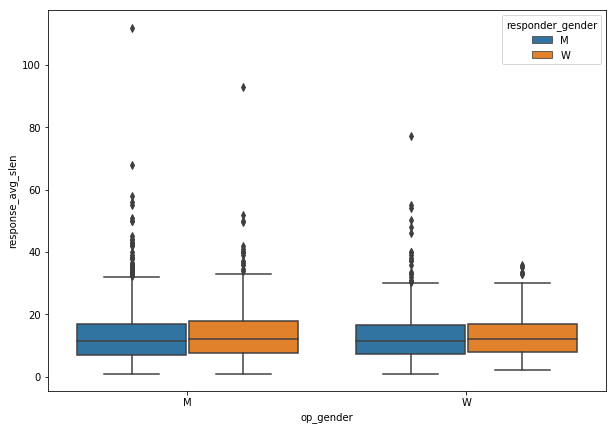

In [192]:
# plot
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_avg_slen', hue='responder_gender',
            data=reddit_sample[reddit_sample.responder_gender != ''])

# save figure
plt.savefig('images/reddit_response_slen_bygender.png')

# show
plt.show()

What can we figure out from this?

#### Post sentence length

The average sentence length for both female and male posters is about the same.

#### Response sentence length

The average response length responding to both female and male posters is about the same. Also, the gender of the responder doesn't seem to make a difference in average sentence length in any case.

#### Gender x Gender
There doesn't seem to be any significant difference between these, but let's take a look anyway.

Is any of this significant (though the differences are very small)?

In [194]:
# t tests

# post slen
print('ttest for post sentence length:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].post_avg_slen,
                      reddit_sample[reddit_sample.op_gender == 'W'].post_avg_slen,
                      equal_var=False))
print('-----------')

# response slen
print('ttest for response sentence length by gender of poster:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].response_avg_slen,
                      reddit_sample[reddit_sample.op_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for response sentence length by gender of responder:',
      stats.ttest_ind(reddit_sample[reddit_sample.responder_gender == 'M'].response_avg_slen,
                      reddit_sample[reddit_sample.responder_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'M')].response_avg_slen,
                      reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'M')].response_avg_slen,
                      reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))

ttest for post sentence length: Ttest_indResult(statistic=-2.2217623496928063, pvalue=0.026312099551557167)
-----------
ttest for response sentence length by gender of poster: Ttest_indResult(statistic=-0.46086012645494623, pvalue=0.6449020438994205)
-----------
ttest for response sentence length by gender of responder: Ttest_indResult(statistic=-2.063502473646968, pvalue=0.039218187921167096)
-----------
ttest for male responder: Ttest_indResult(statistic=-0.6044830113521737, pvalue=0.5456422475641025)
-----------
ttest for female responder: Ttest_indResult(statistic=0.7670477440330423, pvalue=0.44337303673181316)


As expected, only a couple significant findings here. In summary:
- Female posters have longer sentences than male posters (though it's not as significant, and as we can see, the difference was very small)
- There is no significant difference in response length to male vs. female posters
- Female responders have longer sentences than male responders (though it's not as significant, and as we can see, the difference was very small)
- There is no significant difference in sentence length of male or female responders in response to male vs. female posters

In [195]:
# computing average k-band
reddit_sample['post_avg_kband'] = reddit_sample.post_tokens.map(get_avg_google_kband)
reddit_sample['response_avg_kband'] = reddit_sample.response_tokens.map(get_avg_google_kband)

reddit_sample.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo,"[How, do, you, afford, so, many, prayer, potio...","[hes, got, 85, rc, aka, mad, bank, yo]",38,8,12.666667,8.0,2.931034,6.428571
43,43,2007scape,SeaNilly,M,False,JellyTotMonster,,unknown_gender,When you run out of food but still have restor...,"True, but if youre not good with the timing it...","[When, you, run, out, of, food, but, still, ha...","[True, ,, but, if, youre, not, good, with, the...",28,22,28.000000,22.0,2.038462,2.176471
93,93,2007scape,SlayerMaster,M,False,Marasaur,,unknown_gender,Yeah and you want GE and spirit shields just t...,"i maxed the hard way, game is already easy. sp...","[Yeah, and, you, want, GE, and, spirit, shield...","[i, maxed, the, hard, way, ,, game, is, alread...",19,25,9.500000,12.5,2.500000,2.333333
94,94,2007scape,SlayerMaster,M,False,Hi_Noodle,,unknown_gender,Im looking at all the cml records and you guys...,"We dont claim to be an efficiency clan, we are...","[Im, looking, at, all, the, cml, records, and,...","[We, dont, claim, to, be, an, efficiency, clan...",24,60,12.000000,20.0,1.800000,2.530612
100,100,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,"None of those players have botted, but Rens go...",Thats why all of them are perm banned or have ...,"[None, of, those, players, have, botted, ,, bu...","[Thats, why, all, of, them, are, perm, banned,...",19,16,9.500000,8.0,1.230769,3.642857


In [196]:
reddit_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                              \
                   count      mean       std  min      25%       50%   
op_gender                                                              
M                38936.0  2.523404  1.477996  1.0  1.75000  2.228321   
W                10538.0  2.439279  1.315161  1.0  1.76349  2.181818   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.837020  20.0            38718.0  2.533712  1.634580  1.0   
W          2.736842  20.0            10485.0  2.449034  1.553027  1.0   

                                               
                25%       50%       75%   max  
op_gender                                      
M          1.692308  2.200000  2.842669  20.0  
W          1.666667  2.142857  2.736842  20.0

In [197]:
reddit_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M                           35197.0  2.542419  1.651527  1.0  1.692308   
          M                  2755.0  2.443717  1.506306  1.0  1.660256   
          W                   766.0  2.457306  1.236387  1.0  1.805381   
W                            9474.0  2.447705  1.554419  1.0  1.666667   
          M                   742.0  2.496140  1.674797  1.0  1.722222   
          W                   269.0  2.365910  1.084962  1.0  1.736842   

                                 50%       75%   max  
op_gender responder_gender                            
M                           2.203390  2.857143  20.0  
          M                 2.131148  2.750000  20.0  
          W                 2.169948  2.723659  12.0  
W                           2.142857  2.739257  20.0  
          M                 2.142857  2.744318  20.0  
          W                 2.190476  2.711538  12.0

Again, about the same.

### TED linguistic analysis

In [198]:
# how big is this?
ted_responses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190347 entries, 0 to 190413
Data columns (total 5 columns):
post_id          190347 non-null int64
op_id            190347 non-null object
op_gender        190347 non-null object
responder_id     190347 non-null object
response_text    190347 non-null object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [199]:
# reduce again for consistency (though I think this would be possible to handle anyways)
ted_sample = ted_responses_df.sample(50000)
ted_sample.sort_index(inplace=True)

In [200]:
# tokenize...
ted_sample['response_tokens'] = ted_sample.response_text.map(nltk.word_tokenize)

# ... and find length
ted_sample['response_length'] = ted_sample.response_tokens.map(len)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl...","[She, seems, like, a, truly, amazing, person, ...",85
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat...","[Aimee, 's, true, ``, disability, '', is, when...",282
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...,"[VERY, inspiring, indeed, !, I, love, these, T...",27
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...,"[We, take, running, so, much, for, granted, th...",72
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53


average response length when "poster" is male: 93.98550571586979
average response length when "poster" is female: 92.171904644065


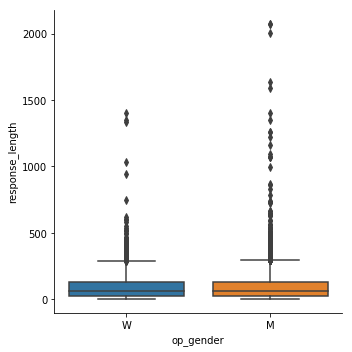

In [203]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=ted_sample)

print('average response length when "poster" is male:',
      ted_sample[ted_sample.op_gender == 'M'].response_length.mean())
print('average response length when "poster" is female:',
      ted_sample[ted_sample.op_gender == 'W'].response_length.mean())

It seems responses are a little longer when the speaker is male than when they are female. Let's look at some more detail:

In [204]:
ted_sample.groupby('op_gender')['response_length'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37877.0,93.985506,97.364514,1.0,25.0,61.0,133.0,2074.0
W,12123.0,92.171905,93.442274,1.0,25.0,61.0,131.0,1401.0


In [205]:
# is this significant? do some t tests

stats.ttest_ind(ted_sample[ted_sample.op_gender == 'M'].response_length,
                ted_sample[ted_sample.op_gender == 'W'].response_length,
                equal_var=False)

Ttest_indResult(statistic=1.8409405497175226, pvalue=0.0656442416173283)

If we go by the standard that a p-value of below 0.05 is significant, then we can conclude the difference in response length to male vs. female speakers is not significant.

Let's look at sentence length:

In [206]:
# getting sentence lengths
response_sent_count = ted_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [207]:
# find average sentence length
response_avg_sent_length = ted_sample.response_length / response_sent_count

In [208]:
# make new column
ted_sample['response_avg_slen'] = response_avg_sent_length

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl...","[She, seems, like, a, truly, amazing, person, ...",85,14.166667
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat...","[Aimee, 's, true, ``, disability, '', is, when...",282,23.500000
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...,"[VERY, inspiring, indeed, !, I, love, these, T...",27,13.500000
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...,"[We, take, running, so, much, for, granted, th...",72,18.000000
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53,13.250000


In [209]:
# summarize
ted_sample.groupby('op_gender')['response_avg_slen'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37877.0,18.511176,12.460652,1.0,11.333333,17.0,22.875000,274.0
W,12123.0,18.048048,12.047086,1.0,11.000000,16.5,22.428571,362.0


Sentence length seems to be about the same whether they are responding to a male vs. a female speaker. Let's not bother doing a ttest here.

In [210]:
# add average google k-band
ted_sample['response_avg_kband'] = ted_sample.response_tokens.map(get_avg_google_kband)

ted_sample.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen,response_avg_kband
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl...","[She, seems, like, a, truly, amazing, person, ...",85,14.166667,1.915493
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat...","[Aimee, 's, true, ``, disability, '', is, when...",282,23.500000,2.155844
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...,"[VERY, inspiring, indeed, !, I, love, these, T...",27,13.500000,2.166667
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...,"[We, take, running, so, much, for, granted, th...",72,18.000000,1.777778
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53,13.250000,2.179487


In [211]:
ted_sample.groupby('op_gender')['response_avg_kband'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37631.0,2.255053,0.964055,1.0,1.785714,2.108108,2.485089,20.0
W,12030.0,2.254545,0.931095,1.0,1.785888,2.100314,2.500000,19.0


And once again, the google k-band doesn't really differ between genders.

## Linguistic difference in gender

Now let's get to some specifics! What about the content of someone's speech/writing makes it more likely for them to be male vs. female? There are some basic differences that have been noted, that I found in *Women, Men, and Language: A sociolinguistic account of gender differences in language*, by Jennifer Coates. There are a lot of differences that Coates discusses regarding gendered speak. Some only apply to actual speech, which is irrelevant in this case, and some require more exchanges other than a simple post/response. I'm gathering a short list of differences that I think would be manageable to investigate for my project:

- Hedges: Hedges express uncertainty, and overall, women seem to use more hedges than men. Some examples of hedges include I think, I guess, I mean, kind of, I’m sure, you know, sort of, perhaps, etc.
- Compliments: It was found that women give and receive more compliments than men. In a study of 484 exchanges of compliments, 51% were woman to woman, 9% were man to man, 23.1% were man to woman, and 16.5% were woman to man. This could also be related to politeness.
- Questions: Typically, women use questions to "avoid the role of expert," found in phrases such as "do you?", "aren't there?", "isn't it?", "right?", etc. On the other hand, men use questions to seek new information or introduce a new topic.

Let's look at the presence of these in our file samples:

In [ ]:
# list of hedges
hedges = ['i think', 'i guess', 'i mean', 'kind of', "i'm sure", 'you know', 'sort of', 'perhaps']

# create function
def find_hedges(text):
    text = text.lower()
    num = 0
    for hedge in hedges:
        num = num + text.count(hedge)
    return num

In [ ]:
# test function
print(find_hedges('I guess!'))
print(find_hedges('I think you know that I sort of'))
print(find_hedges("Perhaps I'm SURE"))

In [ ]:
# hedges in facebook congress (since we don't know responder gender, hedges for them don't really matter)
fb_congress_sample['post_hedges'] = fb_congress_sample.post_text.map(find_hedges)

fb_congress_sample.groupby('op_gender')['post_hedges'].describe()

In [ ]:
# male posters with hedges
male_hedges = fb_congress_sample[(fb_congress_sample.op_gender == 'M') & (fb_congress_sample.post_hedges != 0)]

# female posters with hedges
female_hedges = fb_congress_sample[(fb_congress_sample.op_gender == 'W') & (fb_congress_sample.post_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges.index) / fb_congress_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges.index) / fb_congress_sample.op_gender.value_counts()['W'])

So there seems to be a little more hedges in posts from women!

In [ ]:
# hedges in facebook wiki
fb_wiki_sample['post_hedges'] = fb_wiki_sample.post_text.map(find_hedges)

fb_wiki_sample.groupby('op_gender')['post_hedges'].describe()

In [ ]:
# male posters with hedges
male_hedges = fb_wiki_sample[(fb_wiki_sample.op_gender == 'M') & (fb_wiki_sample.post_hedges != 0)]

# female posters with hedges
female_hedges = fb_wiki_sample[(fb_wiki_sample.op_gender == 'W') & (fb_wiki_sample.post_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges.index) / fb_wiki_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges.index) / fb_wiki_sample.op_gender.value_counts()['W'])

This time, male posters seem to have more hedges... Let's keep going.

In [ ]:
# hedges in fitocracy
fitocracy_sample['post_hedges'] = fitocracy_sample.post_text.map(find_hedges)
fitocracy_sample['response_hedges'] = fitocracy_sample.response_text.map(find_hedges)

print(fitocracy_sample.groupby('op_gender')['post_hedges'].describe())
print(fitocracy_sample.groupby('responder_gender')['response_hedges'].describe())

In [ ]:
# male posters with hedges
male_hedges_post = fitocracy_sample[(fitocracy_sample.op_gender == 'M') & (fitocracy_sample.post_hedges != 0)]
# male responders with hedges
male_hedges_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.response_hedges != 0)]

# female posters with hedges
female_hedges_post = fitocracy_sample[(fitocracy_sample.op_gender == 'W') & (fitocracy_sample.post_hedges != 0)]
# female responders with hedges
female_hedges_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / fitocracy_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / fitocracy_sample.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / fitocracy_sample.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / fitocracy_sample.responder_gender.value_counts()['W'])

This time, female posters have more hedges than male posters, but male responders have more hedges than female responders. Now onto Reddit:

In [ ]:
# hedges in reddit
reddit_sample['post_hedges'] = reddit_sample.post_text.map(find_hedges)
reddit_sample['response_hedges'] = reddit_sample.response_text.map(find_hedges)

print(reddit_sample.groupby('op_gender')['post_hedges'].describe())
print(reddit_sample.groupby('responder_gender')['response_hedges'].describe())

In [ ]:
# male posters with hedges
male_hedges_post = reddit_sample[(reddit_sample.op_gender == 'M') & (reddit_sample.post_hedges != 0)]
# male responders with hedges
male_hedges_response = reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.response_hedges != 0)]

# female posters with hedges
female_hedges_post = reddit_sample[(reddit_sample.op_gender == 'W') & (reddit_sample.post_hedges != 0)]
# female responders with hedges
female_hedges_response = reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / reddit_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / reddit_sample.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / reddit_sample.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / reddit_sample.responder_gender.value_counts()['W'])

This is what we like to see! In both categories (poster and responder), women use more hedges. We can't do our hedge analysis on our last file (TED) because the gender isn't listed for the responder.

## Machine Learning
Let's gather everything I want for machine learning!

I have two goals:
1. I want to analyze the text, regardless of whether it's poster or responder, and train to identify gender. To do this, I'll use my samples from before and combine them to suit my purpose.

In [ ]:
# we don't know gender for responder in fb congress, only gather post data
fb_congress_posts_sample = fb_congress_sample[['op_gender', 'post_text','post_length','post_avg_slen','post_hedges']]
#fb_congress_posts_sample.head()

# we don't know gender for responder in fb wiki, only gather post data
fb_wiki_posts_sample = fb_wiki_sample[['op_gender', 'post_text','post_length','post_avg_slen','post_hedges']]
#fb_wiki_posts_sample.head()

# we know gender for poster and responder in fitocracy
fit_posts_sample = fitocracy_sample[['op_gender', 'post_text','post_length','post_avg_slen','post_hedges']]
fit_responses_sample = fitocracy_sample[['responder_gender', 'response_text','response_length','response_avg_slen','response_hedges']]
#fit_posts_sample.head()
#fit_responses_sample.head()

# we know gender for poster and some responders in reddit
reddit_posts_sample = reddit_sample[['op_gender', 'post_text','post_length','post_avg_slen','post_hedges']]
reddit_responses_sample = reddit_sample[reddit_sample.responder_gender != ''][['responder_gender', 'response_text','response_length','response_avg_slen','response_hedges']]
#reddit_posts_sample.head()
#reddit_responses_sample.head()

# we don't know gender for responder in TED

In [ ]:
# merge them

# first, change column names
columns = ['gender', 'text', 'text_length', 'avg_slen', 'hedges']
fb_congress_posts_sample.columns = columns
fb_wiki_posts_sample.columns = columns
fit_posts_sample.columns = columns
fit_responses_sample.columns = columns
reddit_posts_sample.columns = columns
reddit_responses_sample.columns = columns

# add source column
fb_congress_posts_sample['source'] = 'fb_congress_post'
fb_wiki_posts_sample['source'] = 'fb_wiki_post'
fit_posts_sample['source'] = 'fitocracy_post'
fit_responses_sample['source'] = 'fitocracy_response'
reddit_posts_sample['source'] = 'reddit_post'
reddit_responses_sample['source'] = 'reddit_response'

# facebook files will have duplicates because they have multiple responses per post
fb_congress_posts_sample = fb_congress_posts_sample.drop_duplicates()
fb_wiki_posts_sample = fb_wiki_posts_sample.drop_duplicates()

In [ ]:
# now merge them
all_posts_responses = pd.concat([fb_congress_posts_sample, fb_wiki_posts_sample, fit_posts_sample,
                                 fit_responses_sample, reddit_posts_sample, reddit_responses_sample],
                                ignore_index=True)

all_posts_responses.head()

In [ ]:
all_posts_responses.source.value_counts()

Seems like it's merged well! Let's pickle it!

In [ ]:
import pickle

all_posts_responses.to_pickle("all_posts_responses.pkl")

2. For deeper analysis, I want to focus on when we know the gender of the OP and the responder so I can analyze how people respond to different genders. Which files will work for this?
    - Fitocracy: genders are present for all posters/responders
    - Reddit: genders are present for all posters and only some responders

Looks like only two files. How big are these?

In [ ]:
fitocracy_df.info()

In [ ]:
# getting rid of when we don't know responder's gender
# want op gender to be visible so we know the responder is aware of what gender they are replying to
reddit_gender_visible = reddit_df[(reddit_df.responder_gender != '') & (reddit_df.op_gender_visible == True)]
reddit_gender_visible.info()

How should we merge these?

Both have columns for post_id, op_id, op_gender, responder_id, responder_gender, post_text, and response_text. Additionally, the Reddit data also has a column for subreddit, op_gender_visible, and responder_gender_visible. These probably don't matter for what I want to do with machine learning though - I'm more interested in the actual text. So let's delete these columns from reddit_df. Let's also add a 'source' column so we can tell where they came from when it's merged:

In [ ]:
fitocracy_df['source'] = 'fitocracy'
fitocracy_df.head()

In [ ]:
reddit_gender_visible = reddit_gender_visible.drop(labels=['subreddit','op_gender_visible','responder_gender_visible'], axis=1)
reddit_gender_visible['source'] = 'reddit'
reddit_gender_visible.head()

In [ ]:
gender_visible_df = pd.concat([fitocracy_df, reddit_gender_visible], ignore_index=True)

# let's drop the post id column too and just use the index as post id
gender_visible_df.drop(labels=['post_id'], axis=1, inplace=True)

gender_visible_df.head()

In [ ]:
gender_visible_df.info()

In [ ]:
# now let's do the same linguistic calculations to this df
# not including k-band, because when we did it above, there were no noticeable differences between genders

# tokenize...
gender_visible_df['post_tokens'] = gender_visible_df.post_text.map(nltk.word_tokenize)
gender_visible_df['response_tokens'] = gender_visible_df.response_text.map(nltk.word_tokenize)

# ... and find length
gender_visible_df['post_length'] = gender_visible_df.post_tokens.map(len)
gender_visible_df['response_length'] = gender_visible_df.response_tokens.map(len)

In [ ]:
# getting sentence lengths
post_sent_count = gender_visible_df.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = gender_visible_df.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

# find average sentence length
post_avg_sent_length = gender_visible_df.post_length / post_sent_count
response_avg_sent_length = gender_visible_df.response_length / response_sent_count

# make new columns
gender_visible_df['post_avg_slen'] = post_avg_sent_length
gender_visible_df['response_avg_slen'] = response_avg_sent_length

In [ ]:
# adding column for hedges
gender_visible_df['post_hedges'] = gender_visible_df.post_text.map(find_hedges)
gender_visible_df['response_hedges'] = gender_visible_df.response_text.map(find_hedges)

gender_visible_df.head()

In [ ]:
# look at some of the hedges
samples = gender_visible_df[gender_visible_df.response_hedges != 0].sample(5)

for index, row in samples.iterrows():
    print('text:', row.response_text)
    print('number of hedges:', row.response_hedges)
    print('gender:', row.responder_gender)
    print('--------------')

Now that we've done all this work - let's pickle the dataframe! I'm going to create a new file for the machine learning and reopen the dataframe there.

In [ ]:
gender_visible_df.to_pickle("gender_visible_df.pkl")